In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L1, L2, L1L2

import tensorflow.keras.utils as ku 
import numpy as np 

from tensorflow import keras

1 Data

1.1 Get the data

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt

data = open('/tmp/sonnets.txt').read()
corpus = data.lower().split("\n")

1.2 Tokenize the corpus


In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

1.3 Create Inputs and Labels

1.3.1 n-gram and Input Sequences

In [4]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)
     

1.3.2 Pad sequences


In [5]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))


1.3.3 inputs and labels


In [6]:
xs, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

2 Model


In [7]:
model = keras.models.Sequential([
                                 keras.layers.Embedding(total_words, 64, input_length = max_sequence_len - 1),
                                 keras.layers.Bidirectional(keras.layers.LSTM(20, return_sequences = True)),
                                 keras.layers.Dropout(0.2),
                                 keras.layers.Bidirectional(keras.layers.LSTM(20)),
                                 keras.layers.Dense(256, kernel_regularizer=L2(0.01), activation="relu"),
                                 keras.layers.Dense(total_words, activation="softmax")
])


model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 64)            205504    
                                                                 
 bidirectional (Bidirectiona  (None, 10, 40)           13600     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 10, 40)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 256)               10496     
                                                                 
 dense_1 (Dense)             (None, 3211)              8

In [9]:
 history = model.fit(xs, label, epochs=15, verbose=1)


Epoch 1/15
484/484 [==============================] - 16s 33ms/step - loss: 6.5076 - accuracy: 0.0222
Epoch 2/15
484/484 [==============================] - 16s 33ms/step - loss: 6.4368 - accuracy: 0.0211
Epoch 3/15
484/484 [==============================] - 15s 31ms/step - loss: 6.3791 - accuracy: 0.0237
Epoch 4/15
484/484 [==============================] - 15s 31ms/step - loss: 6.2999 - accuracy: 0.0264
Epoch 5/15
484/484 [==============================] - 15s 32ms/step - loss: 6.2142 - accuracy: 0.0289
Epoch 6/15
484/484 [==============================] - 15s 32ms/step - loss: 6.1471 - accuracy: 0.0304
Epoch 7/15
484/484 [==============================] - 16s 34ms/step - loss: 6.0952 - accuracy: 0.0334
Epoch 8/15
484/484 [==============================] - 15s 31ms/step - loss: 6.0409 - accuracy: 0.0346
Epoch 9/15
484/484 [==============================] - 15s 31ms/step - loss: 5.9814 - accuracy: 0.0383
Epoch 10/15
484/484 [==============================] - 15s 30ms/step - loss: 5.922

3 Plot Accuracy and Loss


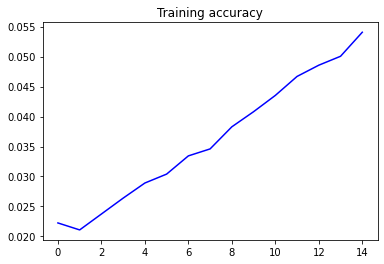

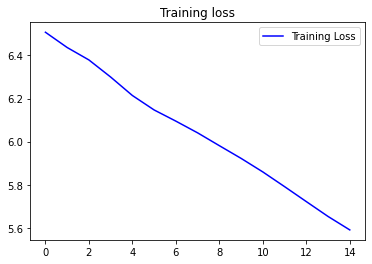

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

4 Predict - Generate Sonnet


In [15]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 32ms/step
Help me Obi Wan Kenobi, you're my only hope of be love see love life of thee i be be is be love of be love of i i be love in be love of be love of i be be love of be be and in thy love of be love love love dead love the love of be of be love love love the love of i be is in thy love love love the love of be love the love of be love love of be be love love of my love of be be and be love be love of the love of thy love
